In [8]:
import numpy
from scipy.interpolate import interp1d
from matplotlib import pyplot, rcParams
%matplotlib inline
from scipy.interpolate import interp1d

# customizing plot parameters
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 10
rcParams['font.family'] = 'StixGeneral'

#####Import NACA0012 Geometry

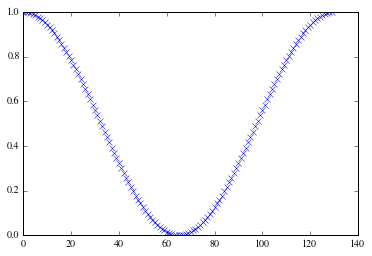

In [37]:
x,y = numpy.genfromtxt('resources/naca0012.dat', delimiter='\t', unpack=True)
t = len(x)
pyplot.plot(range(t), x, 'x');

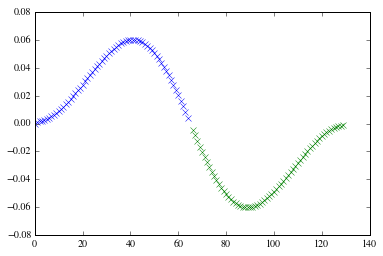

In [51]:
half = len(x)/2
f1 = interp1d(x[0:half], y[0:half])
f2 = interp1d(x[half+1:],y[half+1:])
pyplot.plot(range(t/2), f1(x[0:half]), 'x', range(t/2+1, t), f2(x[half+1:]), 'x')

In [36]:
print type(f)

<class 'scipy.interpolate.interpolate.interp1d'>


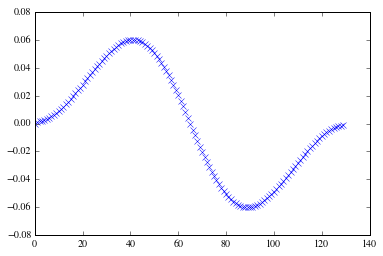

In [38]:
pyplot.plot(range(t),y,'x');

In [79]:
x_min, x_max = numpy.min(x), numpy.max(x)
y_min, y_max = numpy.min(y), numpy.max(y)
scale = 0.2
x_start, x_end = x_min-scale*(x_max-x_min), x_max+scale*(x_max-x_min)
y_start, y_end = y_min-scale*(y_max-y_min), y_max+scale*(y_max-y_min)

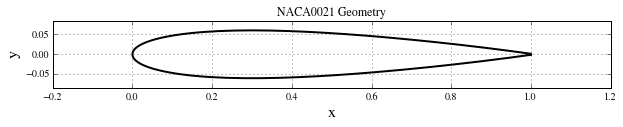

In [80]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('NACA0021 Geometry')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2);

####Panel Class Def

In [17]:
class Panel:
    def __init__(self, xa, ya, xb, yb):
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2
        self.length = numpy.sqrt((xb-xa)**2+(yb-ya)**2)
        
        # orientation of the panel
        if xb-xa <= 0.:
            self.beta = numpy.arccos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = numpy.pi + numpy.arccos(-(yb-ya)/self.length)
        
        # location of the panel
        if self.beta <= numpy.pi:
            self.loc = 'extrados'
        else:
            self.loc = 'intrados'
            
        self.sigma = 0.     # source strength
        self.vt = 0.        # tangential velocity
        self.cp = 0.        # pressure coefficient

####Generate Panels

In [18]:
def gen_panels(x,y,N=40):
    f = interp1d(x, y, kind='cubic')
    R = (x.max()-x.min())/2                                    # radius of the circle
    x_center = (x.max()+x.min())/2                             # x-coord of the center
    x_circle = x_center + R*numpy.cos(numpy.linspace(0, 2*numpy.pi, N+1))  # x-coord of the circle points
    
    x_ends = numpy.copy(x_circle)      # projection of the x-coord on the surface
    y_ends = numpy.empty_like(x_ends)  # initialization of the y-coord Numpy array

    for i, x_p in enumerate(x_ends):
        y_ends[i] = f(x_p)
        

    
    panels = numpy.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
    return panels

In [19]:
def define_panels(x, y, N=40):
    R = (x.max()-x.min())/2                                    # radius of the circle
    x_center = (x.max()+x.min())/2                             # x-coord of the center
    x_circle = x_center + R*numpy.cos(numpy.linspace(0, 2*numpy.pi, N+1))  # x-coord of the circle points
    
    x_ends = numpy.copy(x_circle)      # projection of the x-coord on the surface
    y_ends = numpy.empty_like(x_ends)  # initialization of the y-coord Numpy array

    x, y = numpy.append(x, x[0]), numpy.append(y, y[0])    # extend arrays using numpy.append
    
    # computes the y-coordinate of end-points
    I = 0
    for i in range(N):
        while I < len(x)-1:
            if (x[I] <= x_ends[i] <= x[I+1]) or (x[I+1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        a = (y[I+1]-y[I])/(x[I+1]-x[I])
        b = y[I+1] - a*x[I+1]
        y_ends[i] = a*x_ends[i] + b
    y_ends[N] = y_ends[0]
    
    panels = numpy.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
    return panels

In [20]:
N = 40                            # number of panels
panels = define_panels(x, y, N)   # discretizes of the geometry into panels

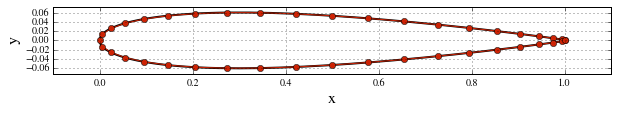

In [22]:
scale = 0.1
# plots the geometry and the panels
x_min, x_max = min(panel.xa for panel in panels), max(panel.xa for panel in panels)
y_min, y_max = min(panel.ya for panel in panels), max(panel.ya for panel in panels)
x_start, x_end = x_min-scale*(x_max-x_min), x_max+scale*(x_max-x_min)
y_start, y_end = y_min-scale*(y_max-y_min), y_max+scale*(y_max-y_min)

size = 10

pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels], panels[0].xa), 
         numpy.append([panel.ya for panel in panels], panels[0].ya), 
         linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305');

In [32]:
for panel in panels:
    print panel.xa, panel.ya, panel.xb
print len(panels)

1.0 0.0 0.993844170298
0.993844170298 0.00212020433181 0.975528258148
0.975528258148 0.00464129505922 0.945503262094
0.945503262094 0.00865606883346 0.904508497187
0.904508497187 0.0139143003491 0.853553390593
0.853553390593 0.020103486711 0.793892626146
0.793892626146 0.0268988202359 0.72699524987
0.72699524987 0.0339565656749 0.654508497187
0.654508497187 0.0409174002503 0.57821723252
0.57821723252 0.0473735213224 0.5
0.5 0.0529243 0.42178276748
0.42178276748 0.0571332127125 0.345491502813
0.345491502813 0.0595746999353 0.27300475013
0.27300475013 0.0598257354123 0.206107373854
0.206107373854 0.0576798332053 0.146446609407
0.146446609407 0.0530539443792 0.0954915028125
0.0954915028125 0.0460489004616 0.0544967379058
0.0544967379058 0.0368219238679 0.0244717418524
0.0244717418524 0.0258094785101 0.00615582970243
0.00615582970243 0.0133880972232 0.0
0.0 0.0 0.00615582970243
0.00615582970243 -0.0133880972232 0.0244717418524
0.0244717418524 -0.0258094785101 0.0544967379058
0.054496737905

In [29]:
N = 40                            # number of panels
panels_new = gen_panels(x, y, N)   # discretizes of the geometry into panels
print panels_new[0].xa

1.0


In [33]:
for panel in panels_new:
    print panel.xa, panel.ya, panel.xb

1.0 -0.000732421875 0.993844170298
0.993844170298 -7.25004340639e+12 0.975528258148
0.975528258148 -139068728087.0 0.945503262094
0.945503262094 3.15366881984e+13 0.904508497187
0.904508497187 -55837073.5929 0.853553390593
0.853553390593 3.82821286555e+13 0.793892626146
0.793892626146 2.36216037028e+12 0.72699524987
0.72699524987 1.37995699678e+14 0.654508497187
0.654508497187 109998336.322 0.57821723252
0.57821723252 9.63828366378e+13 0.5
0.5 -4.76607859371e+12 0.42178276748
0.42178276748 -1.24626519861e+14 0.345491502813
0.345491502813 167337608.906 0.27300475013
0.27300475013 -1.26727496096e+14 0.206107373854
0.206107373854 6.608213012e+12 0.146446609407
0.146446609407 -2.37768192595e+14 0.0954915028125
0.0954915028125 222099305.5 0.0544967379058
0.0544967379058 8.19509857361e+13 0.0244717418524
0.0244717418524 -8.86055397026e+12 0.00615582970243
0.00615582970243 -4.32086551152e+13 0.0
0.0 0.005859375 0.00615582970243
0.00615582970243 -4.32086551152e+13 0.0244717418524
0.02447174185

In [25]:
scale = 0.1
# plots the geometry and the panels
x_min, x_max = min(panel.xa for panel in panels_new), max(panel.xa for panel in panels_new)
y_min, y_max = min(panel.ya for panel in panels_new), max(panel.ya for panel in panels_new)
x_start, x_end = x_min-scale*(x_max-x_min), x_max+scale*(x_max-x_min)
y_start, y_end = y_min-scale*(y_max-y_min), y_max+scale*(y_max-y_min)

size = 10

pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(x, y, color='k', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels_new], panels_new[0].xa), 
         numpy.append([panel.ya for panel in panels_new], panels_new[0].ya), 
         linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305');

ValueError: width and height must each be below 32768